In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
import pickle
from sklearn.utils import resample,shuffle
from tqdm import tqdm_notebook as tqdm
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import re
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing import text
from tensorflow.keras.layers.experimental import RandomFourierFeatures


In [ ]:
from tcn import TCN

In [2]:
df=pd.read_csv('tweet_balanced.csv')

In [3]:
df.drop(columns=df.columns[0],inplace=True)
df

,target,clean_text
0,Neg,is upset that he can not update his facebook b...
1,Neg,i dived many times for the ball managed to sav...
2,Neg,my whole body feels itchy and like its on fire
3,Neg,no it is not behaving at all i am mad why am i...
4,Neg,not the whole crew
...,...,...
165580,Neu,case dont look candidate then that case person...
165581,Neu,congress veteran sudhakar reddy joins bjp afte...
165582,Neu,save your agenda peddling ’ had with terror at...
165583,Neu,did you cover her interaction forum where she ...


In [ ]:
# leabeling data differently to make it easier -1:neg, 0:Neu , 1:Pos
def lab_2class(tar):
    if tar==0:
        return 'Neg'
    elif tar==4:
        return 'Pos'

def lable(tar):
    if tar==-1:
        return 'Neg'
    elif tar==0:
        return 'Neu'
    elif tar==1:
        return 'Pos'

In [ ]:
df['target']=df['category'].apply(lable)

In [ ]:
df

,target,clean_text
0,Neg,is upset that he can not update his facebook b...
1,Neg,i dived many times for the ball managed to sav...
2,Neg,my whole body feels itchy and like its on fire
3,Neg,no it is not behaving at all i am mad why am i...
4,Neg,not the whole crew
...,...,...
165580,Neu,case dont look candidate then that case person...
165581,Neu,congress veteran sudhakar reddy joins bjp afte...
165582,Neu,save your agenda peddling ’ had with terror at...
165583,Neu,did you cover her interaction forum where she ...


In [ ]:
# there is NO class imbalance 
df.target.value_counts()

Pos    55372
Neu    55213
Neg    55000
Name: target, dtype: int64

In [4]:
# removing NaN valued from data

df=df.fillna('NA')
df=df.loc[df.clean_text!='NA']
df=df.loc[df.target!='NA']

###Since we have cleaned the text data, we will now create vectors of text using different approaches

In [ ]:
train,test=train_test_split(df,stratify=df.target,test_size=0.2)

In [ ]:
y_train=train.target.values
y_test=test.target.values

In [31]:
# function to plot confusion matrix and precision and recall matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = ['Neg', 'Neu', 'Pos']
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# Bag of Words

In [ ]:
data=train['clean_text'].values
vectorizer = CountVectorizer(stop_words={'english'},ngram_range=(1,2),min_df=300)
cv= vectorizer.fit(data)
train_x=cv.transform(data).todense()
test_x=cv.transform(test['clean_text'].values).todense()


In [ ]:
lgbm=lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                                colsample_bytree=0.8598256139129683, importance_type='split',
                                                learning_rate=0.1, max_depth=-1, metric='None',
                                                min_child_samples=191, min_child_weight=1, min_split_gain=0.0,
                                                n_estimators=200, n_jobs=-1, num_leaves=46, objective=None,
                                                random_state=314, reg_alpha=0, reg_lambda=0, silent=True,
                                                subsample=0.8720649952803985, subsample_for_bin=200000,
                                                subsample_freq=0)
lgbm.fit(train_x,y_train)
pred=lgbm.predict(test_x)
print(accuracy_score(y_test,pred))
print(f1_score(y_test,pred,average='micro'))

0.8225684693661865
0.8225684693661867


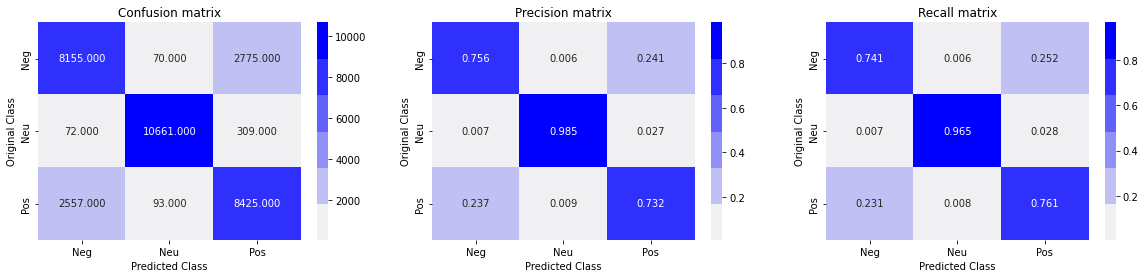

In [ ]:
plot_confusion_matrix(y_test,pred)

#### With BOW approach, best performing model is LGBM which gives 83% accuracy
#### As we caan see, clasifier is facing issues while predicting Negative class, lowest precision and recall
#### Model was able to predict Neutral 93% of time out of total available points which is highest recall
#### out of all predicted positive, 90% of them were actually positive which is highest precision 


# W2Vec

In [ ]:
# we are gonna extract vectors for tweet using glove vectors 
with open('/content/drive/MyDrive/Assignments/LSTM Assignment/glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [ ]:

avg_w2v_vectors = [];
for sentence in tqdm(df.clean_text.values): # for each sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence
    for word in sentence.split(): # for each word in a sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

  0%|          | 0/162969 [00:00<?, ?it/s]

162969
300


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(avg_w2v_vectors,df.target.values,stratify=df.target.values,test_size=0.2)

In [ ]:
lgbm=lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                                colsample_bytree=0.8598256139129683, importance_type='split',
                                                learning_rate=0.1, max_depth=-1, metric='None',
                                                min_child_samples=191, min_child_weight=1, min_split_gain=0.0,
                                                n_estimators=200, n_jobs=-1, num_leaves=46, objective=None,
                                                random_state=314, reg_alpha=0, reg_lambda=0, silent=True,
                                                subsample=0.8720649952803985, subsample_for_bin=200000,
                                                subsample_freq=0)
lgbm.fit(X_train,Y_train)
pred=lgbm.predict(X_test)
accuracy_score(Y_test,pred)

0.684942013867583

#### Performance of same model has reduced for this set of features, reason being the same, difficulty in predicting negative class, lowest precision and recall 

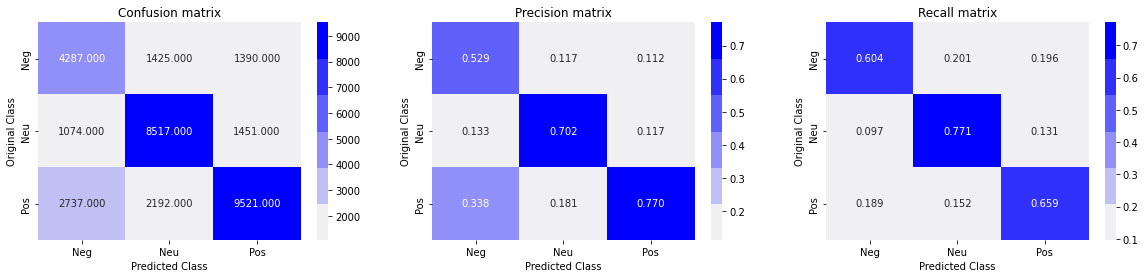

In [ ]:
plot_confusion_matrix(Y_test,pred)

# TF-IDF Weighted W2Vec

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(df.clean_text.values)
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [ ]:

tfidf_w2v_vectors = []
for sentence in tqdm(df.clean_text.values):
    vector = np.zeros(300) 
    tf_idf_weight =0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] 
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) 
            vector += (vec * tf_idf) 
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

  0%|          | 0/162969 [00:00<?, ?it/s]

162969
300


In [ ]:
X_train_tf,X_test_tf,Y_train_tf,Y_test_tf=train_test_split(tfidf_w2v_vectors,df.target.values,stratify=df.target.values,test_size=0.2)

In [ ]:
lgbm=lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                                colsample_bytree=0.8598256139129683, importance_type='split',
                                                learning_rate=0.1, max_depth=-1, metric='None',
                                                min_child_samples=191, min_child_weight=1, min_split_gain=0.0,
                                                n_estimators=200, n_jobs=-1, num_leaves=46, objective=None,
                                                random_state=314, reg_alpha=0, reg_lambda=0, silent=True,
                                                subsample=0.8720649952803985, subsample_for_bin=200000,
                                                subsample_freq=0)
lgbm.fit(X_train_tf,Y_train_tf)
pred=lgbm.predict(X_test_tf)
accuracy_score(Y_test_tf,pred)

0.6595385653801313

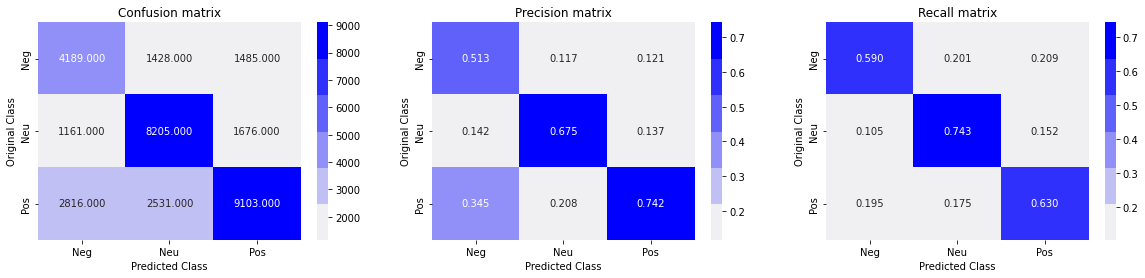

In [ ]:
plot_confusion_matrix(Y_test_tf,pred)

#### Reduction in performance observed, due to same reason, difficulty in predicting negative class

# BERT

#### We are gonna use pre trained bert model to get sentence vectors and then use it to train our model

In [ ]:
import tokenization
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
pip install sentencepiece

     |████████████████████████████████| 1.2 MB 6.2 MB/s 


In [ ]:
def length(text):
    text=text.split()
    return len(text)
df['len']=df['clean_text'].apply(length)

In [ ]:
min(df.len.values),max(df.len.values)

(0, 52)

In [ ]:
max_seq_length = 54


input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")


input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")


segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")


bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
x = tf.keras.layers.Dropout(0.1)(pooled_output)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=x)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 54)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 54)]         0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 54)]         0           []                               
                                                                                                  
 keras_layer_9 (KerasLayer)     [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 54, 768)]                 'input_mask[0][0]',       

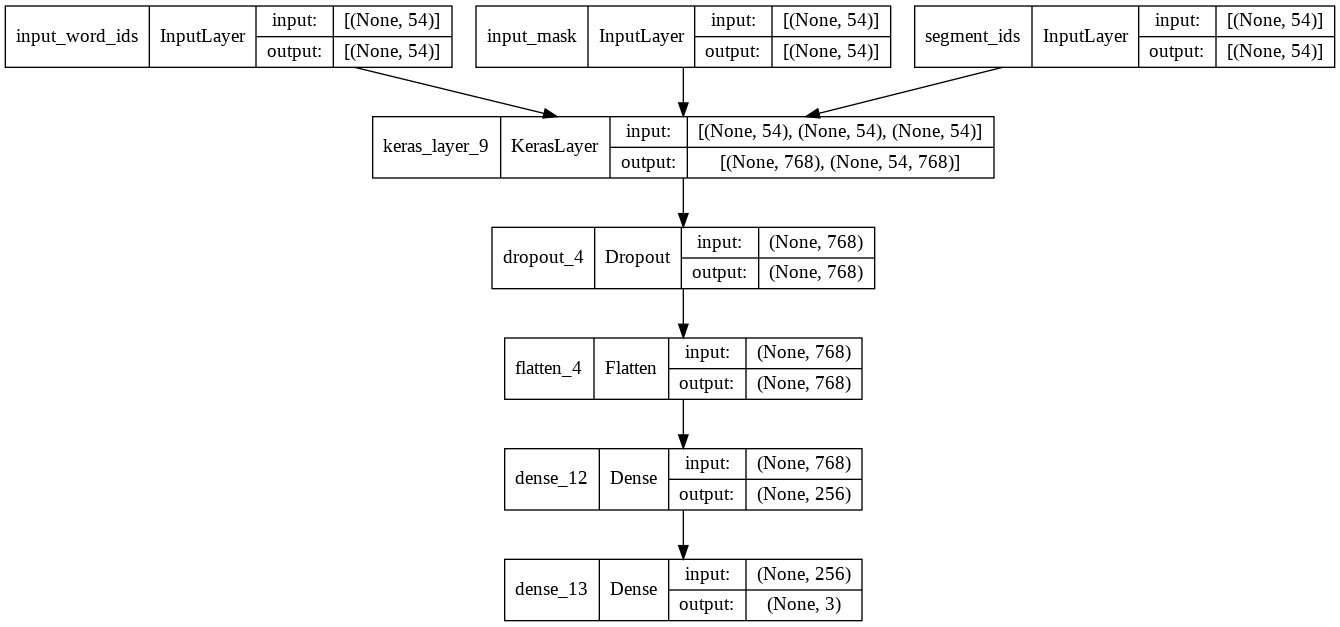

In [ ]:
tf.keras.utils.plot_model(model, "text_clss.png", show_shapes=True)

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case)

In [ ]:
def tokenization_(dataset):
  allowed=52
  dataset_tokens=[]
  dataset_mask=[]
  dataset_segment=[]
  for i in range(len(dataset)):
    mask=[]
    tokenized=tokenizer.tokenize(dataset[i])
    while len(tokenized)<allowed:
      tokenized.append('[PAD]')
    while len(tokenized)>allowed:
      del tokenized[len(tokenized)-1]
    if len(tokenized)==allowed:
      tokens=['[CLS]',*tokenized,'[SEP]']

    for j in tokens:
      if j=='[PAD]':
        mask.append(0)
      elif j!='[PAD]':
        mask.append(1)

    segment=np.array([0]*54)
    token_ids=tokenizer.convert_tokens_to_ids(tokens)
    dataset_tokens.append(token_ids)
    dataset_mask.append(mask)
    dataset_segment.append(segment)
  return np.array(dataset_tokens),np.array(dataset_mask),np.array(dataset_segment)


In [ ]:
X_train_tokens, X_train_mask, X_train_segment=tokenization_(train.clean_text.values)

In [ ]:
X_test_tokens, X_test_mask, X_test_segment=tokenization_(test.clean_text.values)

In [ ]:
y_train=OneHotEncoder().fit_transform(y_train.reshape(-1,1)).todense()
y_test=OneHotEncoder().fit_transform(y_test.reshape(-1,1)).todense()

In [ ]:
    history = model.fit([X_train_tokens, X_train_mask, X_train_segment],
                        y_train,
                        epochs=3,
                        batch_size=100,
                        verbose=1,
                        validation_data=([X_test_tokens, X_test_mask, X_test_segment], y_test))

Epoch 1/3
1325/1325 [==============================] - 1140s 850ms/step - loss: 0.9061 - accuracy: 0.5563 - val_loss: 0.7471 - val_accuracy: 0.6930
Epoch 2/3
1325/1325 [==============================] - 1121s 846ms/step - loss: 0.7136 - accuracy: 0.6715 - val_loss: 0.6438 - val_accuracy: 0.7273
Epoch 3/3
1325/1325 [==============================] - 1121s 846ms/step - loss: 0.6414 - accuracy: 0.7060 - val_loss: 0.5925 - val_accuracy: 0.7430


In [ ]:
    history = model.fit([X_train_tokens, X_train_mask, X_train_segment],
                        y_train,
                        epochs=3,
                        batch_size=100,
                        verbose=1,
                        validation_data=([X_test_tokens, X_test_mask, X_test_segment], y_test))

Epoch 1/3
1325/1325 [==============================] - 1116s 842ms/step - loss: 0.6027 - accuracy: 0.7222 - val_loss: 0.5628 - val_accuracy: 0.7517
Epoch 2/3
1325/1325 [==============================] - 1114s 841ms/step - loss: 0.5796 - accuracy: 0.7319 - val_loss: 0.5421 - val_accuracy: 0.7596
Epoch 3/3
1325/1325 [==============================] - 1114s 841ms/step - loss: 0.5624 - accuracy: 0.7405 - val_loss: 0.5274 - val_accuracy: 0.7645


#### Better performance than previous, but stil not better than BOW, now clearly BOW gives the best results so we will train  NN on those features and try to improve performance
#### We are left with one more vectorisation technique which is word embedding which we will use while training NN having LSTM/CNN layers 

# BOW+DNN

In [ ]:
import os
import re
from tqdm import tqdm_notebook as tq
import pandas as pd
import nltk
import warnings
warnings.filterwarnings("ignore")
from keras_preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Reshape
from tensorflow.keras.layers import Embedding,LSTM
from keras.layers import Conv1D,Flatten
from keras.layers import Concatenate
from keras.layers import MaxPooling1D
from keras.preprocessing import text
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Input
from keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Activation, Flatten, Dense
import numpy as np
from keras.callbacks import Callback
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
inputs = tf.keras.layers.Input((1453,), name="input", )
r=Dense(564,activation='relu')(inputs)
d1=Dropout(0.85)(r)
d=Dense(128,activation='relu')(d1)
d2=Dropout(0.9)(d)
den=Dense(3,activation="softmax")(d2)
model=tf.keras.Model(inputs=inputs,outputs=den)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1453)]            0         
                                                                 
 dense_9 (Dense)             (None, 564)               820056    
                                                                 
 dropout_2 (Dropout)         (None, 564)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               72320     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 892,763
Trainable params: 892,763
Non-trainab

In [ ]:
model.compile(loss='CategoricalCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
train_y=OneHotEncoder().fit_transform(y_train.reshape(-1,1)).todense()
test_y=OneHotEncoder().fit_transform(y_test.reshape(-1,1)).todense()

In [ ]:
model.fit(train_x,train_y, batch_size=50,validation_data=[test_x,test_y], epochs=30)

Epoch 1/30
2608/2608 [==============================] - 16s 6ms/step - loss: 0.8981 - accuracy: 0.5919 - val_loss: 0.6111 - val_accuracy: 0.7753
Epoch 2/30
2608/2608 [==============================] - 15s 6ms/step - loss: 0.6758 - accuracy: 0.7418 - val_loss: 0.5174 - val_accuracy: 0.8292
Epoch 3/30
2608/2608 [==============================] - 15s 6ms/step - loss: 0.6133 - accuracy: 0.7796 - val_loss: 0.4912 - val_accuracy: 0.8419
Epoch 4/30
2608/2608 [==============================] - 15s 6ms/step - loss: 0.5915 - accuracy: 0.7930 - val_loss: 0.4887 - val_accuracy: 0.8408
Epoch 5/30
2608/2608 [==============================] - 14s 6ms/step - loss: 0.5801 - accuracy: 0.8004 - val_loss: 0.4755 - val_accuracy: 0.8472
Epoch 6/30
2608/2608 [==============================] - 15s 6ms/step - loss: 0.5647 - accuracy: 0.8063 - val_loss: 0.4734 - val_accuracy: 0.8473
Epoch 7/30
2608/2608 [==============================] - 15s 6ms/step - loss: 0.5603 - accuracy: 0.8086 - val_loss: 0.4700 - val_ac

In [ ]:
pred=model.predict(test_x)

In [ ]:
p=[]
for i in pred:
    i=np.argmax(i)
    if i==0:
        p.append('Neg')
    elif i==1:
        p.append('Neu')
    elif i==2:
        p.append('Pos')
accuracy_score(y_test,p)

0.848867889795668

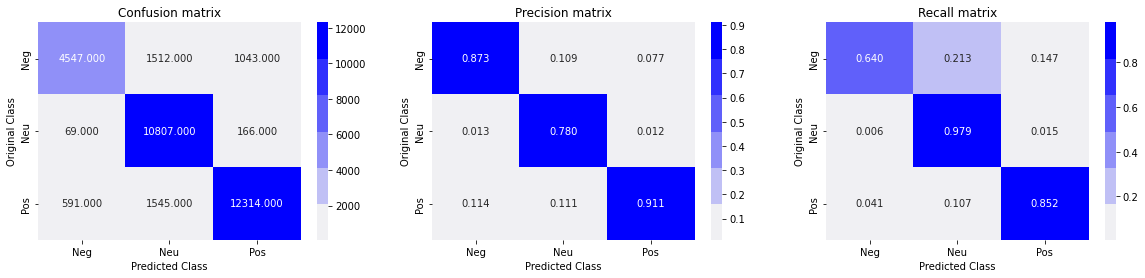

In [ ]:
plot_confusion_matrix(y_test,p)

#### Pefformance has slightly improved with NN for BOW (84%), still lowest performance on negative class though it has 2nd highest precision

# Word Embedding + LSTM and CNN

In [ ]:
def length(text):
    text=text.split()
    return len(text)
df['len']=df['clean_text'].apply(length)

In [ ]:
df

,target,clean_text,len
0,Neg,is upset that he can not update his facebook b...,22
1,Neg,i dived many times for the ball managed to sav...,16
2,Neg,my whole body feels itchy and like its on fire,10
3,Neg,no it is not behaving at all i am mad why am i...,23
4,Neg,not the whole crew,4
...,...,...,...
165580,Neu,case dont look candidate then that case person...,40
165581,Neu,congress veteran sudhakar reddy joins bjp afte...,9
165582,Neu,save your agenda peddling ’ had with terror at...,41
165583,Neu,did you cover her interaction forum where she ...,9


In [ ]:
df.target.value_counts()

Pos    55372
Neu    55211
Neg    55000
Name: target, dtype: int64

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D,Conv1D, MaxPooling2D, Dense, Flatten,LSTM,concatenate,Embedding,SpatialDropout1D,Dropout,Reshape,Concatenate,GlobalAveragePooling1D,GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LeakyReLU
from keras.initializers import he_normal,glorot_normal
from keras.regularizers import l1,l2

#### We are gonna use embedding layer to provide word embeddings to lstm and cnn layers, then concat it followed by dense layers

In [ ]:
# splitting data
X_train,X_test=train_test_split(df,stratify=df.target,test_size=0.2)
train_tweet=X_train.clean_text.values
test_tweet=X_test.clean_text.values
train_labels=X_train.target.values
test_labels=X_test.target.values
train_len=X_train.len.values 
test_len=X_test.len.values

In [ ]:
# Tokenizing it for embedding layers
tokenizer=text.Tokenizer(300)
tokenizer.fit_on_texts(train_tweet)
X_train_tweets=tokenizer.texts_to_matrix(train_tweet)
X_test_tweets=tokenizer.texts_to_matrix(test_tweet)


In [ ]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

87991

In [ ]:
# tokennising with max len 300
from keras_preprocessing import sequence
X_train_tweets=sequence.pad_sequences(X_train_tweets,maxlen=300)
X_test_tweets=sequence.pad_sequences(X_test_tweets,maxlen=300)


In [ ]:
train_y=OneHotEncoder().fit_transform(train_labels.reshape(-1,1)).todense()
test_y=OneHotEncoder().fit_transform(test_labels.reshape(-1,1)).todense()

In [ ]:
# using metrix as weights of embedding layer created from glove vectors 
index=dict()
f=open("/content/glove.6B.300d.txt")
for line in f:
  values=line.split()
  word=values[0]
  coefs=np.asarray(values[1:],dtype='float32')
  index[word]=coefs
f.close()

In [ ]:
metrics=np.zeros((vocab_size,300))

for word,ind in tokenizer.word_index.items():
  if ind > vocab_size-1:
    break
  else:
    vector=index.get(word)
    if vector is not None:
      metrics[ind]=vector

In [ ]:
# Architecture 
# Instead of COnv1D layer i have used Temporal Convolution Network TCN which is good for sequencial and temporal data
embadding_layer=Embedding(input_dim=vocab_size,output_dim=300,weights=[metrics],trainable=True)
input= Input(shape=(300,))

x = embadding_layer(input)
x1 =LSTM(128,return_sequences=True)(x)
x1 = SpatialDropout1D(0.3)(x1)
x1 = Flatten()(x1)

input2=Input(shape=(300))
emb=Embedding(input_dim=vocab_size,output_dim=300,weights=[metrics],trainable=True)(input2)
x2 = SpatialDropout1D(0.1)(emb)
    
#x2 = TCN(128,dilations = [1, 2, 4], return_sequences=True, activation = 'relu', name = 'tcn1')(x2)
x2 = TCN(64,dilations = [1, 2, 4], return_sequences=True, activation = 'relu', name = 'tcn2')(x2)
x2 = GlobalMaxPooling1D()(x2)   


input3=Input(shape=(1,))
x3=Dense(128,activation='relu')(input3)
x=Concatenate()([x1,x2,x3])
x=RandomFourierFeatures(output_dim=4090, scale=10.0, kernel_initializer="gaussian")(x)
x = Dense(8,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)

x = Dense(8,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = LeakyReLU()(x)
output= Dense(3,activation='softmax')(x)
model_1=Model([input,input2,input3], output)

model_1.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding_3 (Embedding)        (None, 300, 300)     26397300    ['input_5[0][0]']                
                                                                                                  
 embedding_4 (Embedding)        (None, 300, 300)     26397300    ['input_6[0][0]']                
                                                                                            

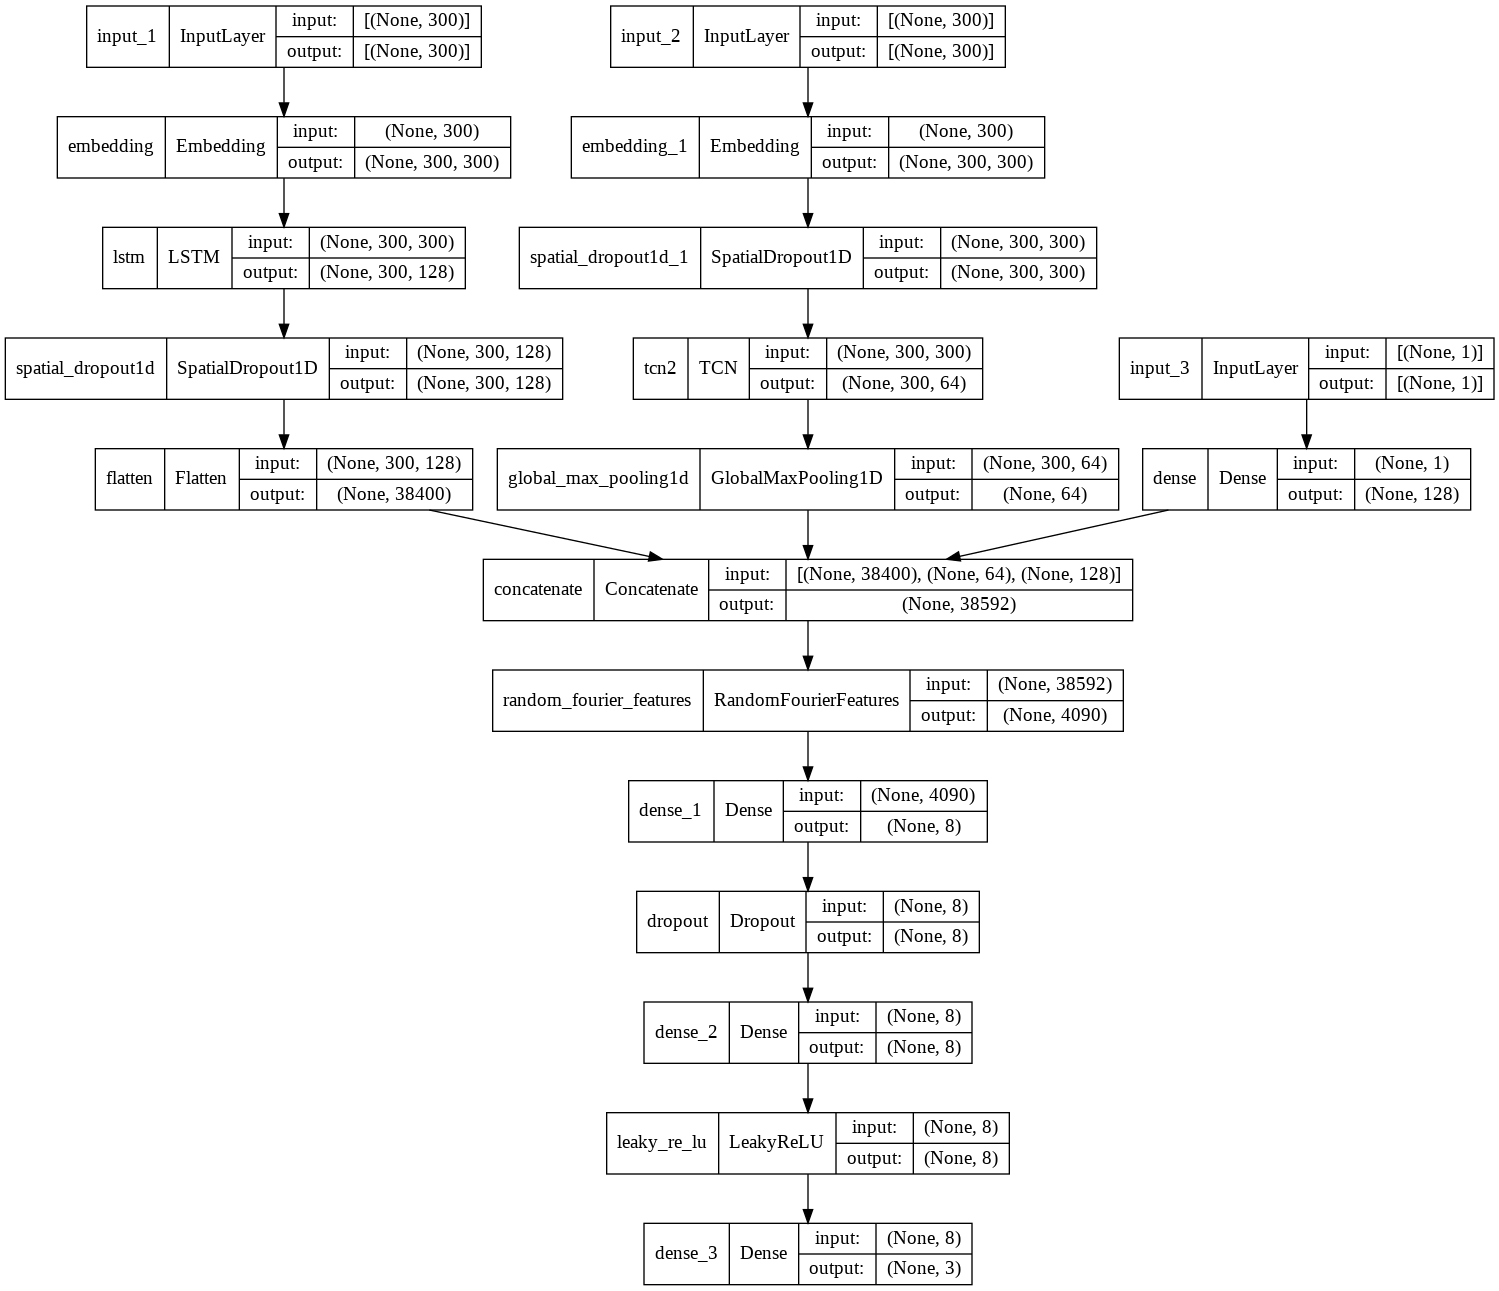

In [ ]:
tf.keras.utils.plot_model(model_1, "text_clss.png", show_shapes=True)

In [ ]:
model_1.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.001,decay = 1e-4),metrics='accuracy')


In [ ]:
from keras.callbacks import Callback

validation_data=([X_test_tweets,X_test_tweets,test_len],test_y)
train_data=([X_train_tweets,X_train_tweets,train_len],train_y)
class Metrics(Callback):
  def on_train_begin(self, logs={}):
    self.train_f1 = []
    self.val_f1=[]

  def on_epoch_end(self, epoch, logs={}):
    val_predict = (np.asarray(self.model.predict(validation_data[0]))).round()
    val_targ = validation_data[1]
    _val_f1 = f1_score(val_targ, val_predict,average='micro')

    train_predict = (np.asarray(self.model.predict(train_data[0]))).round()
    train_targ = train_data[1]
    _train_f1 = f1_score(train_targ, train_predict,average='micro')


    self.train_f1.append(_train_f1)
    self.val_f1.append(_val_f1)
    
    
    print ("Train F1 Score is: {} and Validation F1 Score is: {}".format(_train_f1,_val_f1))
  
 
metrics = Metrics()

In [ ]:
cb=[metrics]

model_1.fit([X_train_tweets,X_train_tweets,train_len],train_y,epochs=5, verbose=1, batch_size=556,validation_data=([X_test_tweets,X_test_tweets,test_len],test_y),callbacks=cb)

Epoch 1/5
239/239 [==============================] - 538s 2s/step - loss: 0.6963 - accuracy: 0.6545 - val_loss: 0.4616 - val_accuracy: 0.7600
Epoch 2/5
239/239 [==============================] - 441s 2s/step - loss: 0.5154 - accuracy: 0.7254 - val_loss: 0.4443 - val_accuracy: 0.7768
Epoch 3/5
239/239 [==============================] - 440s 2s/step - loss: 0.4939 - accuracy: 0.7390 - val_loss: 0.4451 - val_accuracy: 0.7741
Epoch 4/5
239/239 [==============================] - 444s 2s/step - loss: 0.4839 - accuracy: 0.7471 - val_loss: 0.4303 - val_accuracy: 0.7858
Epoch 5/5
239/239 [==============================] - 446s 2s/step - loss: 0.4788 - accuracy: 0.7481 - val_loss: 0.4253 - val_accuracy: 0.7854


In [ ]:
model_1.fit([X_train_tweets,X_train_tweets,train_len],train_y,epochs=5, verbose=1, batch_size=1556,validation_data=([X_test_tweets,X_test_tweets,test_len],test_y))

Epoch 1/5
86/86 [==============================] - 178s 2s/step - loss: 0.4683 - accuracy: 0.7572 - val_loss: 0.4233 - val_accuracy: 0.7841
Epoch 2/5
86/86 [==============================] - 177s 2s/step - loss: 0.4660 - accuracy: 0.7587 - val_loss: 0.4206 - val_accuracy: 0.7891
Epoch 3/5
47/86 [===============>..............] - ETA: 1:14 - loss: 0.4645 - accuracy: 0.7601

#### This model performs better than BERT, but still not the best performing model, architecture is big and complex enough, we can find a better alternative

# RoBERTa
### Robustly Optimised BERT pre-training Approach

#### RoBERTa is better than BERT in terms of generalising,and performance, since it was trained on large amount of data for longer time

In [ ]:
pip install tokenizers

In [ ]:
pip install transformers

In [7]:
import tensorflow as tf
import tensorflow.keras.backend as K
import tokenizers
from transformers import RobertaTokenizer, TFRobertaModel

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [8]:
MODEL_NAME = 'roberta-base'
MAX_LEN = 50

In [9]:
X_data = df[['clean_text']].to_numpy().reshape(-1)
y_data = df[['target']].to_numpy().reshape(-1)

In [10]:
def roberta_encode(texts, tokenizer):
    ct = len(texts)
    input_ids = np.ones((ct, MAX_LEN), dtype='int32')
    attention_mask = np.zeros((ct, MAX_LEN), dtype='int32')
    token_type_ids = np.zeros((ct, MAX_LEN), dtype='int32') # Not used in text classification

    for k, text in enumerate(texts):
        # Tokenize
        tok_text = tokenizer.tokenize(text)
        
        # Truncate and convert tokens to numerical IDs
        enc_text = tokenizer.convert_tokens_to_ids(tok_text[:(MAX_LEN-2)])
        
        input_length = len(enc_text) + 2
        input_length = input_length if input_length < MAX_LEN else MAX_LEN
        
        # Add tokens [CLS] and [SEP] at the beginning and the end
        input_ids[k,:input_length] = np.asarray([0] + enc_text + [2], dtype='int32')
        
        # Set to 1s in the attention input
        attention_mask[k,:input_length] = 1

    return {
        'input_word_ids': input_ids,
        'input_mask': attention_mask,
        'input_type_ids': token_type_ids
    }

In [11]:
tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=777)

In [26]:
X_train = roberta_encode(X_train, tokenizer)
X_test = roberta_encode(X_test, tokenizer)


In [14]:
        input_word_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_word_ids')
        input_mask = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_mask')
        input_type_ids = tf.keras.Input(shape=(MAX_LEN,), dtype=tf.int32, name='input_type_ids')

        roberta_model = TFRobertaModel.from_pretrained(MODEL_NAME)
        x = roberta_model(input_word_ids, attention_mask=input_mask, token_type_ids=input_type_ids)

        x = x[0]

        x = tf.keras.layers.Dropout(0.1)(x)
        x = tf.keras.layers.Flatten()(x)
        x = tf.keras.layers.Dense(256, activation='relu')(x)
        #x=RandomFourierFeatures(output_dim=4090, scale=10.0, kernel_initializer="gaussian")(x)

        x = tf.keras.layers.Dense(3, activation='softmax')(x)

        model = tf.keras.Model(inputs=[input_word_ids, input_mask, input_type_ids], outputs=x)
        model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-5),loss='categorical_crossentropy',metrics=['accuracy'])
        model.summary()


Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 50)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 50)]         0           []                               
                                                                                                  
 input_type_ids (InputLayer)    [(None, 50)]         0           []                               
                                                                                                  
 tf_roberta_model (TFRobertaMod  TFBaseModelOutputWi  124645632  ['input_word_ids[0][0]',         
 el)                            thPoolingAndCrossAt               'input_mask[0][0]',         

In [23]:
y_train=OneHotEncoder().fit_transform(y_train.reshape(-1,1)).todense()
y_test=OneHotEncoder().fit_transform(y_test.reshape(-1,1)).todense()

In [ ]:
    history = model.fit(X_train,
                        y_train,
                        epochs=3,
                        batch_size=120,
                        verbose=1,
                        validation_data=(X_test, y_test))

Epoch 1/3
1104/1104 [==============================] - 2571s 2s/step - loss: 0.2924 - accuracy: 0.8722 - val_loss: 0.2625 - val_accuracy: 0.8878
Epoch 2/3
1104/1104 [==============================] - 2536s 2s/step - loss: 0.2365 - accuracy: 0.8995 - val_loss: 0.2445 - val_accuracy: 0.8958
Epoch 3/3
1104/1104 [==============================] - 2524s 2s/step - loss: 0.2070 - accuracy: 0.9130 - val_loss: 0.2458 - val_accuracy: 0.8980


In [ ]:
model.save_weights('/content/drive/MyDrive/roberta.h5')

In [18]:
model.load_weights('/content/drive/MyDrive/roberta.h5')

In [19]:
model.evaluate(X_test,y_test)

1035/1035 [==============================] - 239s 221ms/step - loss: 0.2458 - accuracy: 0.8980


[0.24579210579395294, 0.8980281949043274]

In [27]:
pred=model.predict(X_test)
pred=[np.argmax(i) for i in pred]
p=[]
for i in pred:
    if i==0:
        p.append('Neg')
    elif i==1:
        p.append('Neu')
    elif i==2:
        p.append('Pos')
accuracy_score(Y_test,p)

0.8980282030377148

In [30]:
f1_score(Y_test,p,average='macro')

0.8983731425164868

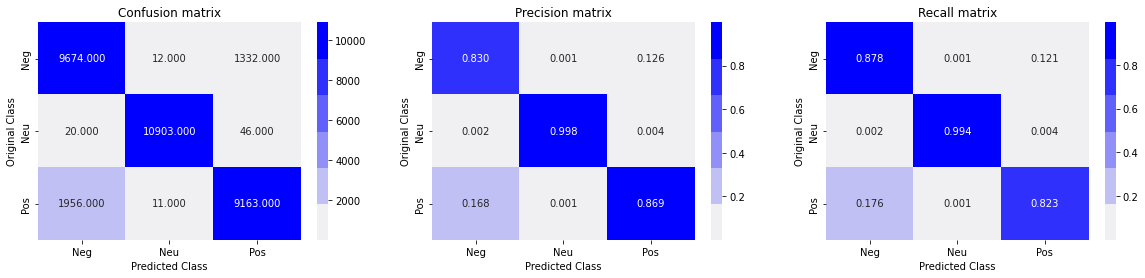

In [32]:
plot_confusion_matrix(Y_test,p)

#### Best Performing model so far with 89.8% validation accuracy and f1 score, it performed excellently for neutral class , 0.99 precision and recall, almost 1950 positive points were predicted as negative and 1332 negative points predicted as positive